## Import Statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from matplotlib import pyplot as plt
%matplotlib inline

### A. Data import and high level exploration

In [2]:
df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t', low_memory=False)
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The data has 163 columns and 356027 rows of datatypes Float and object. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


### Handling missing values

In [4]:
df.isnull().sum() # Prints 163 columns

code                                        26
url                                         26
creator                                      3
created_t                                    3
created_datetime                            10
last_modified_t                              0
last_modified_datetime                       0
product_name                             17512
generic_name                            298313
quantity                                236742
packaging                               266068
packaging_tags                          266068
brands                                   29050
brands_tags                              29070
categories                              252728
categories_tags                         252752
categories_en                           252726
origins                                 330977
origins_tags                            331015
manufacturing_places                    314019
manufacturing_places_tags               314026
labels       

#### Some columns contain a huge amount of null values whereas others are fully filled with null values. Let's drop all columns containing less than 5000 non-null values. Other columns null values can not be dropped or filled in with different values in this case as we can not know if the product contains the ingredient or not and if it does at which amount. 

In [5]:
df.dropna(thresh=5000, axis=1, inplace=True)
df.isnull().sum() # Prints 86 columns

code                             26
url                              26
creator                           3
created_t                         3
created_datetime                 10
last_modified_t                   0
last_modified_datetime            0
product_name                  17512
generic_name                 298313
quantity                     236742
packaging                    266068
packaging_tags               266068
brands                        29050
brands_tags                   29070
categories                   252728
categories_tags              252752
categories_en                252726
origins                      330977
origins_tags                 331015
manufacturing_places         314019
manufacturing_places_tags    314026
labels                       296929
labels_tags                  296849
labels_en                    296823
emb_codes                    323537
emb_codes_tags               323541
first_packaging_code_geo     335155
cities_tags                 

Let's get information about the data

In [6]:
df.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,...,vitamin-b6_100g,vitamin-b9_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,283867.000000,283867.000000,283867.000000,295367.000000,2.794970e+05,263823.000000,23040.000000,23075.000000,143443.000000,144170.000000,...,6897.000000,5330.000000,5.390000e+03,24848.000000,141517.000000,5938.000000,140660.000000,6392.000000,254856.000000,254856.000000
mean,1.876851,0.023430,0.059736,1125.453320,5.606587e+04,5.092460,10.501218,6.372548,0.073487,0.020065,...,0.046952,0.006820,2.741797e-04,0.424284,0.127284,0.613267,0.003791,0.531415,9.166137,8.980656
std,2.501022,0.153094,0.280660,936.825952,2.963385e+07,7.965148,16.789189,10.930572,1.539417,0.357963,...,1.665441,0.332325,1.907492e-02,12.503642,3.349236,11.963513,0.216565,13.360342,8.999870,9.151757
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-3.570000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-0.000260,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,382.000000,1.000000e-01,0.000000,0.007500,0.000000,0.000000,0.000000,...,0.000260,0.000030,7.000000e-07,0.106000,0.000000,0.097300,0.000000,0.021000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1092.000000,5.290000e+00,1.790000,4.000000,2.270000,0.000000,0.000000,...,0.000706,0.000052,1.900000e-06,0.180000,0.036000,0.206000,0.001010,0.075000,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1674.000000,2.000000e+01,7.140000,10.710000,7.350000,0.000000,0.020000,...,0.001515,0.000070,4.690000e-06,0.341000,0.107000,0.357000,0.002400,0.141000,16.000000,16.000000
max,30.000000,2.000000,6.000000,231199.000000,1.566667e+10,550.000000,100.000000,98.000000,369.000000,95.238000,...,93.800000,23.076923,1.400000e+00,1870.370000,694.737000,559.459000,50.000000,657.143000,40.000000,40.000000


#### We notice a lot of outliers and some negative amounts in the data that we will have to deal with when conducting our analysis.

Let's have a look at the numerical variable distributions:

/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3331: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


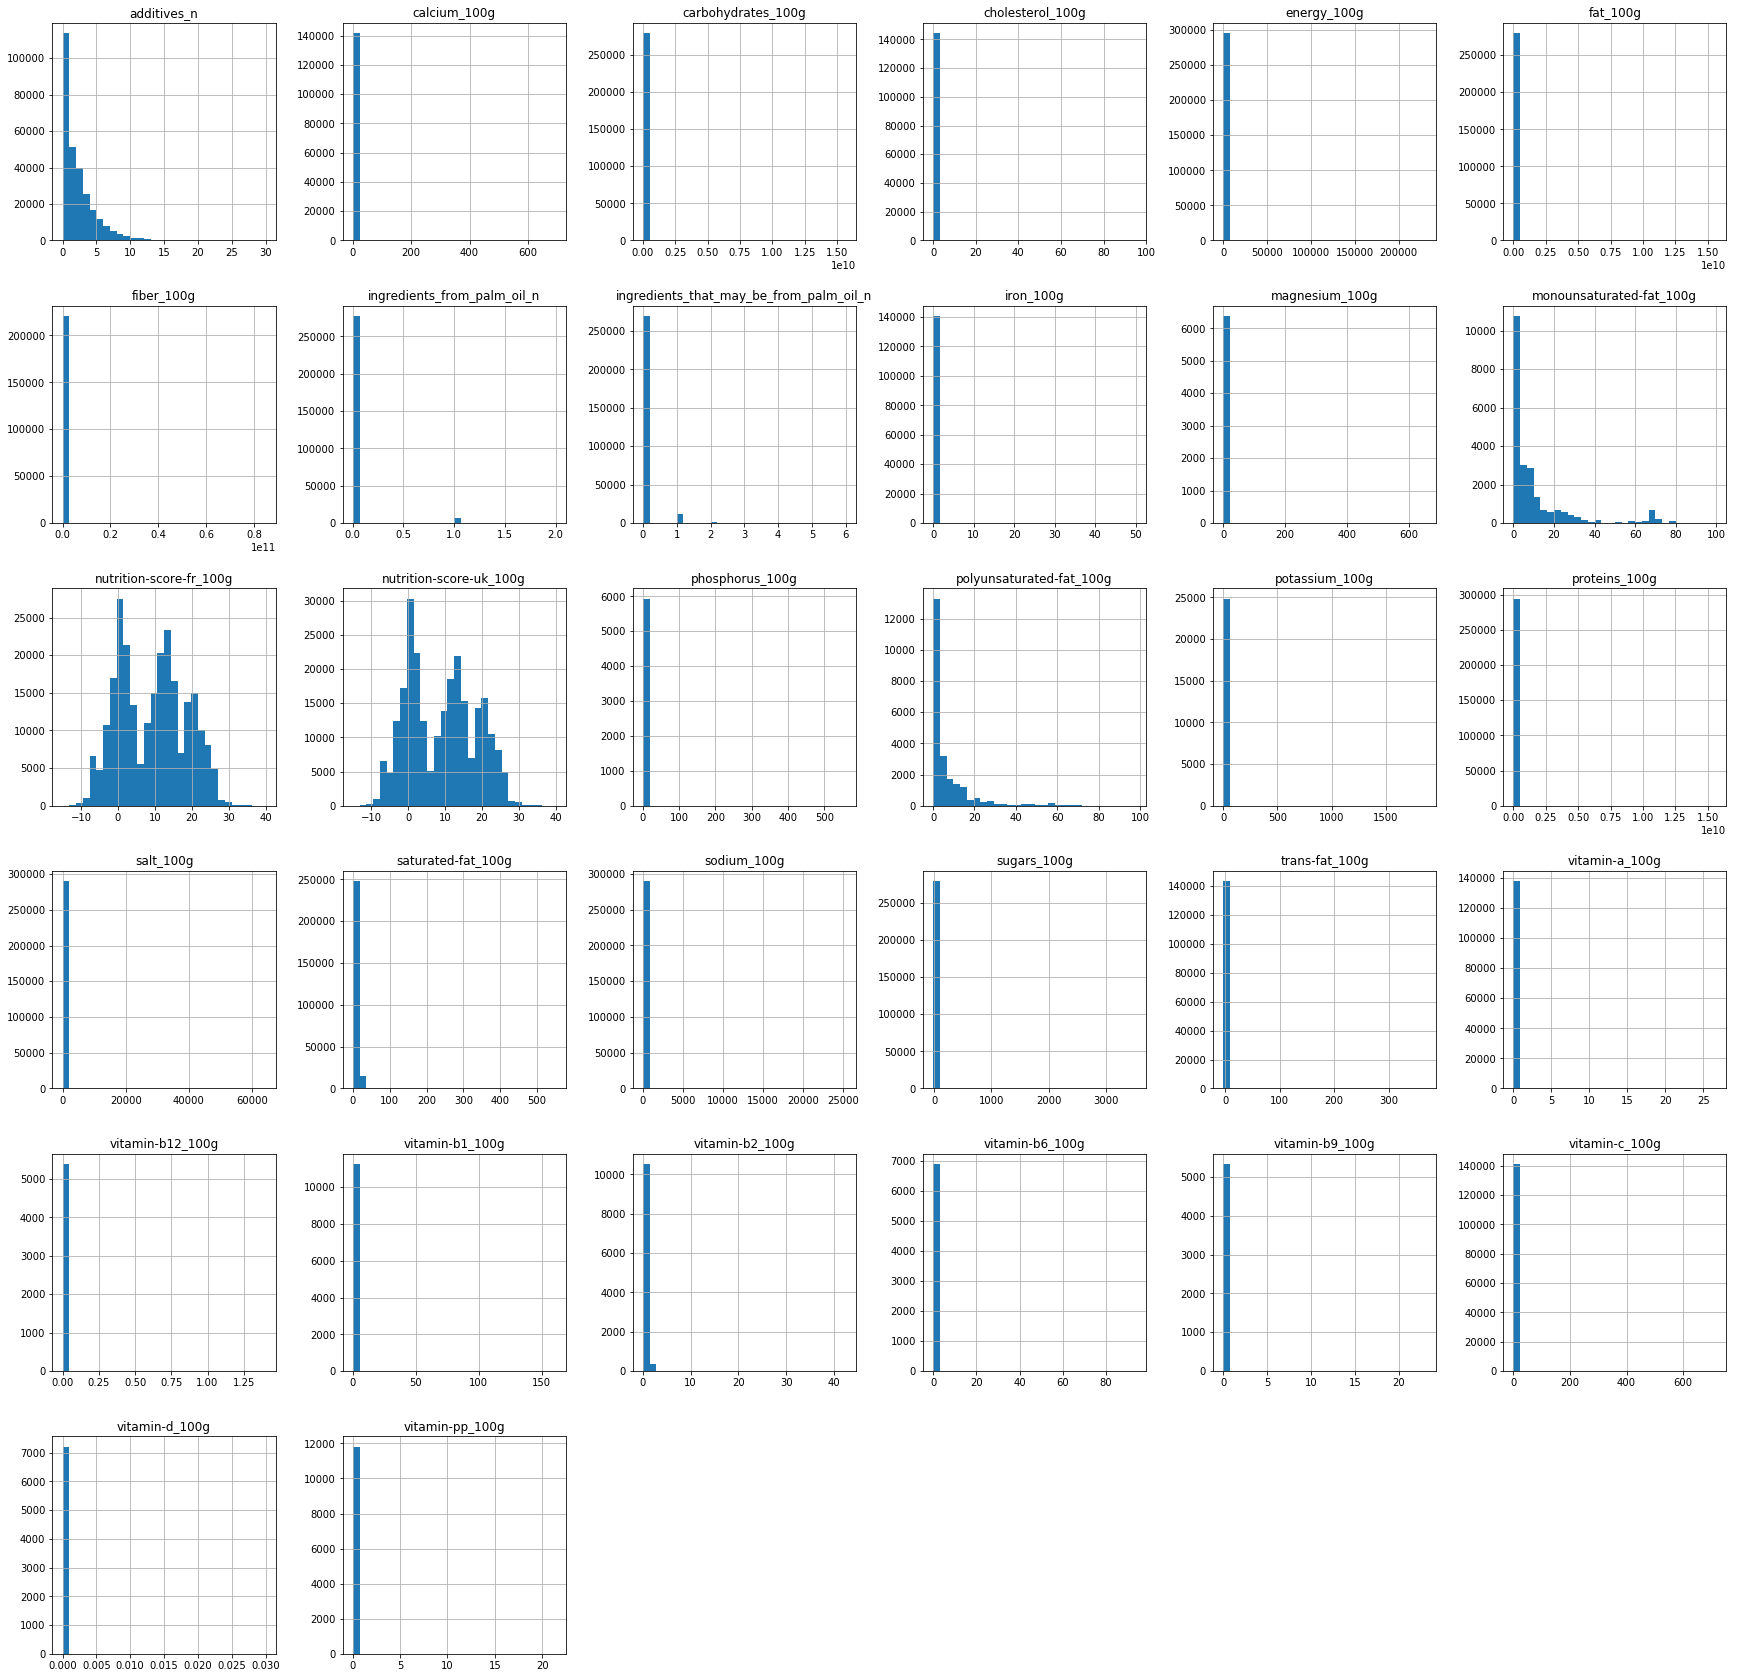

In [7]:
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
df.hist(ax=ax, bins=30)
plt.show()

#### We notice what seems to be Poisson distributions among some numerical variables. Additives, monounsatured fat and polyunsatured fat are the best examples. 

#### Nutritions scores columns has very similar contents and might follow multi-gaussian distributions.


Let's check if some columns are lists:

In [8]:
(df.select_dtypes('object')\
.sample(100)\
.applymap(type)\
.astype(str) == "<class 'list'>")\
.any(0)

code                                          False
url                                           False
creator                                       False
created_t                                     False
created_datetime                              False
last_modified_t                               False
last_modified_datetime                        False
product_name                                  False
generic_name                                  False
quantity                                      False
packaging                                     False
packaging_tags                                False
brands                                        False
brands_tags                                   False
categories                                    False
categories_tags                               False
categories_en                                 False
origins                                       False
origins_tags                                  False
manufacturin

No columns seems to be lists. However, some columns could be lists but considered as strings by Python. This is the case with ingredients column for example:

In [25]:
df['ingredients_text'].head(20)

0                                                   NaN
1     Bananas, vegetable oil (coconut oil, corn oil ...
2     Peanuts, wheat flour, sugar, rice flour, tapio...
3     Organic hazelnuts, organic cashews, organic wa...
4                                       Organic polenta
5     Rolled oats, grape concentrate, expeller press...
6                         Organic long grain white rice
7     Org oats, org hemp granola (org oats, evaporat...
8     Organic chocolate liquor, organic raw cane sug...
9     Organic expeller pressed, refined high oleic s...
10                                 Organic adzuki beans
11           Organic refined durum semolina wheat flour
12    Roasted peanuts (peanuts, peanut or canola oil...
13                            Organic golden flax seeds
14    Organic dry roasted pumpkin seeds, tamari (soy...
15    Organic rolled oats, honey, raisins, almonds, ...
16                               Organic raw hazelnuts.
17    Organic bananas, organic coconut oil, orga

#### Alphabets

In [24]:
for serie in df.select_dtypes('object'):
    print(serie,':', serie.isalnum(), serie.isalpha())

code : True True
url : True True
creator : True True
created_t : False False
created_datetime : False False
last_modified_t : False False
last_modified_datetime : False False
product_name : False False
generic_name : False False
quantity : True True
packaging : True True
packaging_tags : False False
brands : True True
brands_tags : False False
categories : True True
categories_tags : False False
categories_en : False False
origins : True True
origins_tags : False False
manufacturing_places : False False
manufacturing_places_tags : False False
labels : True True
labels_tags : False False
labels_en : False False
emb_codes : False False
emb_codes_tags : False False
first_packaging_code_geo : False False
cities_tags : False False
purchase_places : False False
stores : True True
countries : True True
countries_tags : False False
countries_en : False False
ingredients_text : False False
allergens : True True
traces : True True
traces_tags : False False
traces_en : False False
serving_size : 

#### Comment about alphabet

Let's look for duplicated products in the data set. 

We will look for duplicates in the "product_name" and "code" columns in order to detect duplicate products.

In [10]:
df.loc[df.duplicated(['code', 'product_name']),:]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,vitamin-b6_100g,vitamin-b9_100g,vitamin-b12_100g,potassium_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
193960,NaN,NaN,villecomtal-sur-arros-gers-france,"Veynes,France",Super U,France,en:france,France,"_Lait_ entier (78%), fruits : mangue, abricot...",Lait,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193993,NaN,NaN,villecomtal-sur-arros-gers-france,"Torcy 77,France",Carrefour,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194001,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,France,en:france,France,"_Lait_ écrémé, fruits : fraise (12 %), cerise ...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194003,NaN,NaN,villecomtal-sur-arros-gers-france,"Saint-Priest,France",Auchan,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194009,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,NaN,France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème, lactiques",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194055,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France,Lille","Banque alimentaire,Carrefour,Leclerc,E.Leclerc",France,en:france,France,"_Lait_ écrémé (72,6% en moyenne) (Origine Fran...","Lait, lait, lactiques",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194084,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, rhubarbe (8 %), sucre (8 %), la...","Lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194086,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, ananas (8 %), sucre (7,1 %), _l...","Lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194090,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,NaN,France,en:france,France,lAllFElt...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194092,NaN,NaN,villecomtal-sur-arros-gers-france,"Veynes,France","Super U,Lecler",France,en:france,France,"_lait_ entier (73,6%), fruits : rhubarbe, figu...","lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that 22 rows seems to be duplicates. Let's drop them:

In [11]:
df = df.drop_duplicates(['code', 'product_name'])

Determine which columns might be categorical:

In [12]:
might_be_cat = {}
for var in df.select_dtypes('object').columns:
    might_be_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold
likely_cat = []
for col in might_be_cat:
    if might_be_cat[col]:
        likely_cat.append(col)
likely_cat

['creator',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'main_category',
 'main_category_en']

Let's now determine the 10 most frequent values for each one of these columns:

In [15]:
most_frequent_values = {}
for col in likely_cat:
    most_frequent_values[col] = df[col].value_counts()[0:10]